In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150

In [2]:
engine = create_engine("sqlite:///GDS.db")
df = pd.read_sql_table('Emissions_Data_Joined', engine)
df_sectors = pd.read_sql_table('Sectors', engine)

In [3]:
df_plot = df[['Company Name', 'Scope_1_emissions_(tCO₂e)']].merge(
    df_sectors, on='Company Name').loc[df['Scope_1_emissions_(tCO₂e)']!='-']

df_plot['Scope_1_emissions_(tCO₂e)'] = df_plot['Scope_1_emissions_(tCO₂e)'].astype(int)

industries_sorted = df_plot.groupby('Industry').mean().sort_values(by='Scope_1_emissions_(tCO₂e)').index
df_plot['Industry'] = pd.Categorical(df_plot['Industry'], industries_sorted)

sns.scatterplot(df_plot.sort_values('Industry'), alpha=0.6, x='Industry', y='Scope_1_emissions_(tCO₂e)',
                 hue='Industry', palette='viridis', legend=False)
plt.yscale("log")
plt.ylabel('Scope 1 Emissions (Log Scale)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Scope 1 Emissions by Industry')
plt.show()

c:\Users\Gavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Scope_1_emissions_(tCO₂e)` for parameter `y`

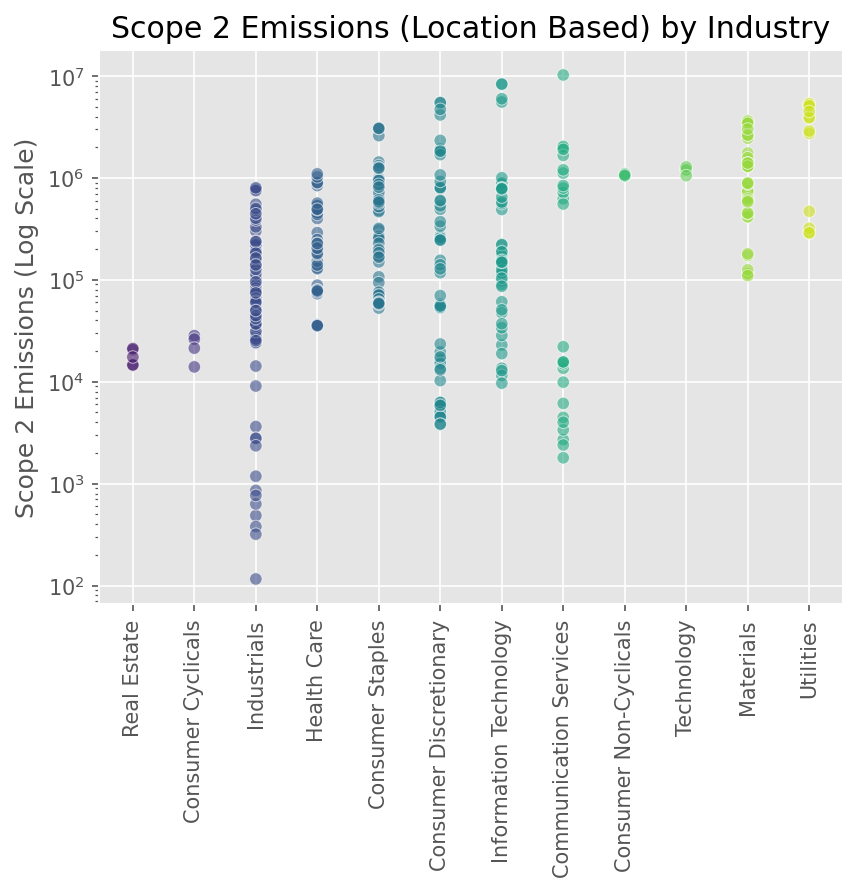

In [ ]:
df_plot = df[['Company Name', 'Scope_2_emissions_(tCO₂e)_Location']].merge(
    df_sectors, on='Company Name').loc[df['Scope_2_emissions_(tCO₂e)_Location']!='-']

df_plot['Scope_2_emissions_(tCO₂e)_Location'] = df_plot['Scope_2_emissions_(tCO₂e)_Location'].astype(int)

df_plot['Industry'] = pd.Categorical(df_plot['Industry'], industries_sorted)

sns.scatterplot(df_plot.sort_values('Industry'), alpha=0.6, x='Industry', y='Scope_2_emissions_(tCO₂e)_Location',
                 hue='Industry', palette='viridis', legend=False)
plt.yscale("log")
plt.ylabel('Scope 2 Emissions (Log Scale)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Scope 2 Emissions (Location Based) by Industry')
plt.show()

In [4]:
df_plot = df[['Company Name', 'Scope_2_emissions_(tCO₂e)_Market']].merge(
    df_sectors, on='Company Name').loc[df['Scope_2_emissions_(tCO₂e)_Market']!='-']

df_plot['Scope_2_emissions_(tCO₂e)_Market'] = df_plot['Scope_2_emissions_(tCO₂e)_Market'].astype(int)

df_plot['Industry'] = pd.Categorical(df_plot['Industry'], industries_sorted)

sns.scatterplot(df_plot.sort_values('Industry'), alpha=0.6, x='Industry', y='Scope_2_emissions_(tCO₂e)_Market',
                 hue='Industry', palette='viridis', legend=False)
plt.yscale("log")
plt.ylabel('Scope 2 Emissions (Log Scale)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Scope 2 Emissions (Market Based) by Industry')
plt.show()

c:\Users\Gavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Scope_2_emissions_(tCO₂e)_Market` for parameter `y`

In [8]:
df_fin = pd.read_sql_table('FinancialsTableFinal', engine)
df_fin['Year'] = df_fin['Date'].str[:4].astype(int)+1
df_fin.drop(columns='Date', inplace=True)

In [9]:
df['Year'] = df['Year'].astype(int)
df_merged = df.merge(df_fin, on=['Company Name', 'Year']).replace('-', None)

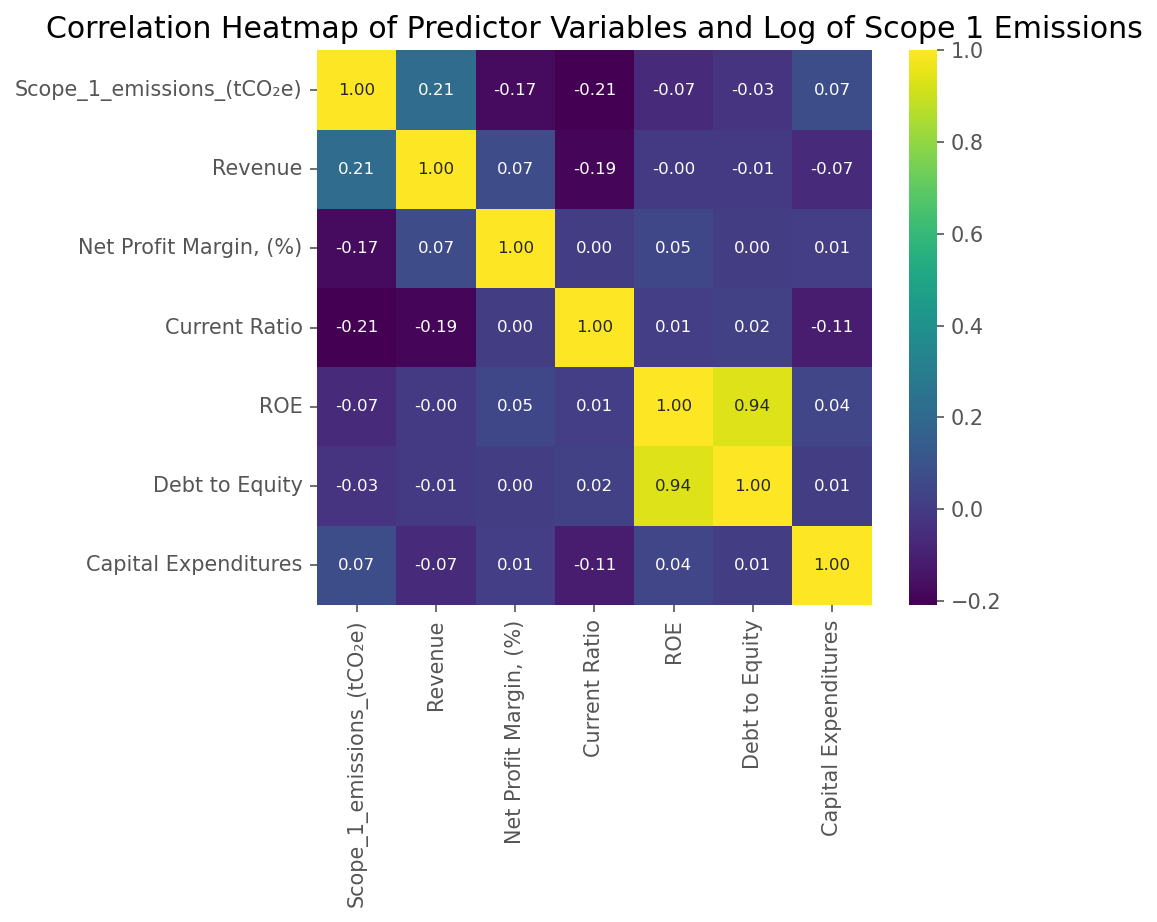

In [10]:
df_scope1 =  df_merged.drop(columns=['Scope_2_emissions_(tCO₂e)_Location',
                                      'Scope_2_emissions_(tCO₂e)_Market']).dropna().drop(columns='Company Name')
df_scope1['Scope_1_emissions_(tCO₂e)'] = np.log10(df_scope1['Scope_1_emissions_(tCO₂e)'].astype(float))

corr_matrix = df_scope1.drop(columns='Year').corr()
cols = corr_matrix.columns
hm = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 8}, yticklabels=cols, xticklabels=cols, cmap='viridis')
hm.set_title("Correlation Heatmap of Predictor Variables and Log of Scope 1 Emissions")

plt.show()

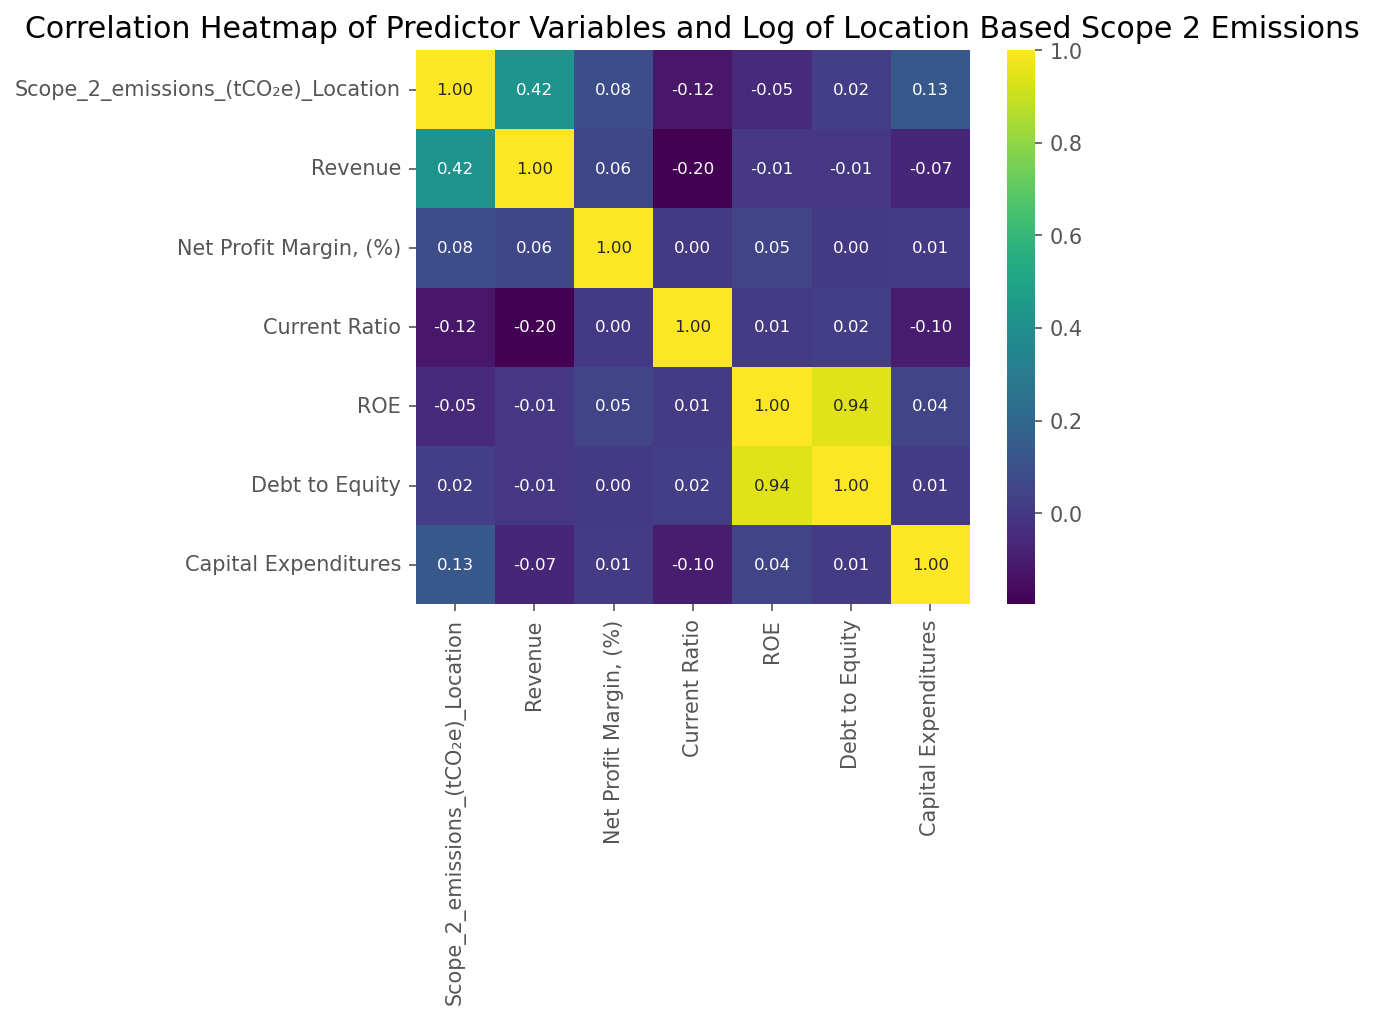

In [11]:
df_scope2 =  df_merged.drop(columns=['Scope_1_emissions_(tCO₂e)',
                                      'Scope_2_emissions_(tCO₂e)_Market']).dropna().drop(columns='Company Name')
df_scope2['Scope_2_emissions_(tCO₂e)_Location'] = np.log10(df_scope2['Scope_2_emissions_(tCO₂e)_Location'].astype(float))

corr_matrix = df_scope2.drop(columns='Year').corr()
cols = corr_matrix.columns
hm = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 8}, yticklabels=cols, xticklabels=cols, cmap='viridis')
hm.set_title("Correlation Heatmap of Predictor Variables and Log of Location Based Scope 2 Emissions")

plt.show()

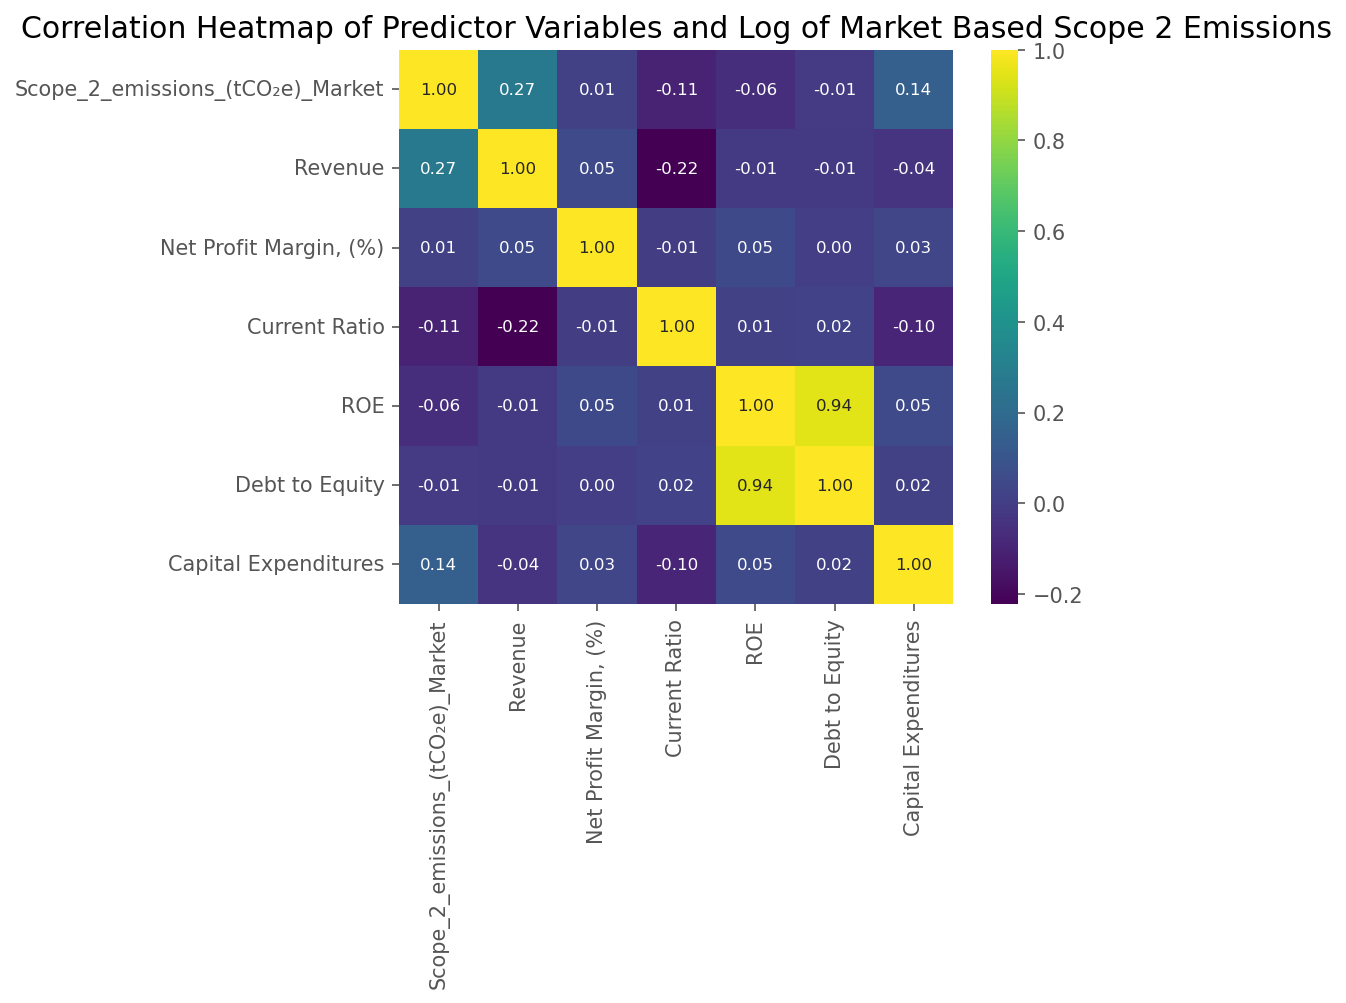

In [12]:
df_scope2 =  df_merged.drop(columns=['Scope_1_emissions_(tCO₂e)',
                                      'Scope_2_emissions_(tCO₂e)_Location']).dropna().drop(columns='Company Name')
df_scope2['Scope_2_emissions_(tCO₂e)_Market'] = np.log10(df_scope2['Scope_2_emissions_(tCO₂e)_Market'].astype(float))

corr_matrix = df_scope2.drop(columns='Year').corr()
cols = corr_matrix.columns
hm = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 8}, yticklabels=cols, xticklabels=cols, cmap='viridis')
hm.set_title("Correlation Heatmap of Predictor Variables and Log of Market Based Scope 2 Emissions")

plt.show()